<div class="alert alert-info">
<span class="label label-info" style="font-size:15px;">Master 2 Data Science</span><br><br>
   Data Stream  : Lab2 <br>
   STUDENT : GHRIBI Saif Eddine
    
</div>

<div class="alert alert-success">
<span class="label label-success" style="font-size:15px;">Question 1</span><br><br>
<p> Write a pseudo code of the reservoir sampling algorithm.</p>


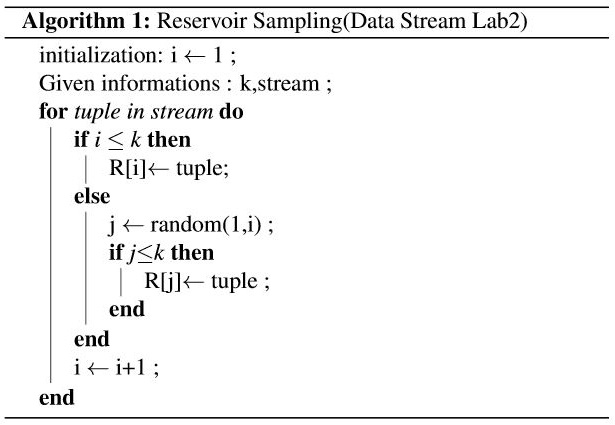

<div class="alert alert-success">
<span class="label label-success" style="font-size:15px;">Question 2</span><br><br>
<p>Write a functional and robust Python code that process tuple one by one.</p>


In [4]:
import numpy as np


class ReservoirSampling:

    def __init__(self, k, reservoir):
        # initialize the reservoir ,i and k of the defined problem
        self.i = 0
        self.k = k
        self.reservoir = reservoir

    def tuple_process(self, input_tup):
        # This function processes every new coming tuple

        # if i<k ,the reservoir is still not full,hence we append the new tuple
        if self.i < self.k:
            self.reservoir.append(input_tup)

        # else we apply the algorith of reservoir sampling
        else:
            # Bonus : we can make the decision about whether we add the new tuple and what
            # will be its position with one operation by choosing randomly with a unifrm distribution from (1,i)
            # the index i_new given by this distribution ,if it is is smaller than k then we subtitute
            # the i_new th element with the new tuple ,otherwise we do nothing
            idx = np.random.randint(0, self.i)
            if(idx < self.k):
                self.reservoir[idx] = input_tup
        # we update i by increasing it by 1
        self.i += 1

    def monitorReservoir(self):
        # This function prints the state of the reservoir
        print("i = {} ---> Reservoir = {}".format(self.i, self.reservoir))


# Test reservoir sampling on a reservoir of size 5 and 30 tuples
reservoir, k, N = list(), 5, 30

# Create an instance of the class ReservoirSampling with attributes k and reservoir
R_s = ReservoirSampling(k, reservoir)

# the Stream
tuple_stream = ["Tuple"+str(i+1) for i in range(N)]

# process the Stream
for tuple_i in tuple_stream:
    # process the new tuple
    R_s.tuple_process(tuple_i)
    # monitor the reservoir
    R_s.monitorReservoir()
    
    


i = 1 ---> Reservoir = ['Tuple1']
i = 2 ---> Reservoir = ['Tuple1', 'Tuple2']
i = 3 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple3']
i = 4 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple3', 'Tuple4']
i = 5 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple3', 'Tuple4', 'Tuple5']
i = 6 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple3', 'Tuple4', 'Tuple6']
i = 7 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple7', 'Tuple4', 'Tuple6']
i = 8 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple7', 'Tuple4', 'Tuple6']
i = 9 ---> Reservoir = ['Tuple1', 'Tuple2', 'Tuple9', 'Tuple4', 'Tuple6']
i = 10 ---> Reservoir = ['Tuple1', 'Tuple10', 'Tuple9', 'Tuple4', 'Tuple6']
i = 11 ---> Reservoir = ['Tuple1', 'Tuple10', 'Tuple9', 'Tuple4', 'Tuple6']
i = 12 ---> Reservoir = ['Tuple1', 'Tuple10', 'Tuple9', 'Tuple4', 'Tuple12']
i = 13 ---> Reservoir = ['Tuple1', 'Tuple10', 'Tuple9', 'Tuple4', 'Tuple12']
i = 14 ---> Reservoir = ['Tuple14', 'Tuple10', 'Tuple9', 'Tuple4', 'Tuple12']
i = 15 ---> Reservoir = ['Tuple14', 'Tuple15', 'Tu

<div class="alert alert-success">
<span class="label label-success" style="font-size:15px;">Question 3</span><br><br>
<p>Write a mathematical proof : the reservoir includes uniformity drawn tuples.</p>


let k be the size of the reservoir<br><br>
1) The probability that a tuple at time i joins the reservoir is $$\mathbb{P}_{replace}(i)= \frac{k}{i}$$ 
<br><br>
2) So what is the probability that a tuple statys in the reservoir till time i ? 

* We have the prbability that a tuple does not get replaced at time j is $$\mathbb{P}_{stay}(j) = 1 - \frac{1}{j}$$ 
* Then the probability that a tuple in the reservoir does not get replaced till time i is : 
$$\begin{align}
\mathbb{P}_{notreplace}(i)=\prod_{j=k+1}^i\mathbb{P}_{stay}(j) = \prod_{j=k+1}^i (1-\frac{1}{j}) &= \prod_{j=k+1}^i (\frac{j-1}{j})\\ &= \frac{k}{k+1}\cdot\frac{k+1}{k+2}\cdots \frac{i-2}{i-1}\cdot \frac{i-1}{i} = \frac{k}{i}.
\end{align}$$ 
<br>
$$\mathbb{P}_{notreplace}(i) = \frac{k}{i}$$


#### Conclusion: 
We can conclude from 1) and 2) that the reservoir includes uniformity drawn tuples.

<div class="alert alert-success">
<span class="label label-success" style="font-size:15px;">Question 4</span><br><br>
<p>What algorithmic problem is encountered when the reservoir size tends
towards infinity? ( clue: a slowdown due to the use of RAM … but why?)</p>


If the reservoir size tends towards infinity ,the algorithm  will store almost all the incoming tuples ,these tuples will be stored in the ram untill this latter is almost full then the the operating system will use what we call the SWAP memory which is physically the hard drive ,so the tuples that wont be able stored in ram will be stored in swap in the hard drive ,the slowdown will be caused since the algorithm is dealing with the hard drive which has way less write/read speeds for instance a ddr3 ram has 17 000 mb/s write/read speed while a 7200 rpm hard drive has at most 160 mb write/read speed which is almost 100 times slower thus the slowdown.Note: an ssd could be an upgrade (3200mb write/read speed) but we are still in the scale of nanosecend response vs millisecond response ,we will still face a slowdown.